In [7]:
# Daten einlesen - wir arbeiten nochmals mit dem Standard-Datensatz Iris von Scikit-Learn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values # dieses Mal werden zwei Features genommen!
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
# PCA trainieren
from sklearn.decomposition import PCA

# mit 'n_components=2' könnte die Anzahl Komponenten definiert werden
pca = PCA()
X_pca = pca.fit(X)

# wie sind die Parameter für die Linearkombination?
display(pca.components_)

# wie hoch ist die erklärte Varianz pro Hauptkomponente?
display(pca.explained_variance_ratio_)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

array([0.98143272, 0.01856728])

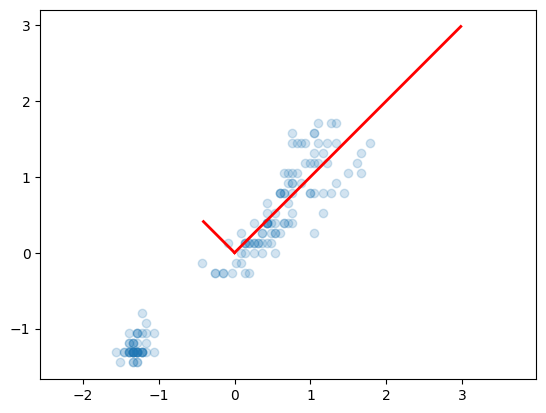

In [30]:
# dartsellen der neuen Achsen im alten Koordinatensytem
import matplotlib.pyplot as plt
import numpy as np

# Zeichne die Datenpunkte
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# Zeichne die Hauptkomponenten als Linien
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([pca.mean_[0], pca.mean_[0] + v[0]],
             [pca.mean_[1], pca.mean_[1] + v[1]],
             color='red', linewidth=2)

# Zeige den Plot an
plt.axis('equal')
plt.show()

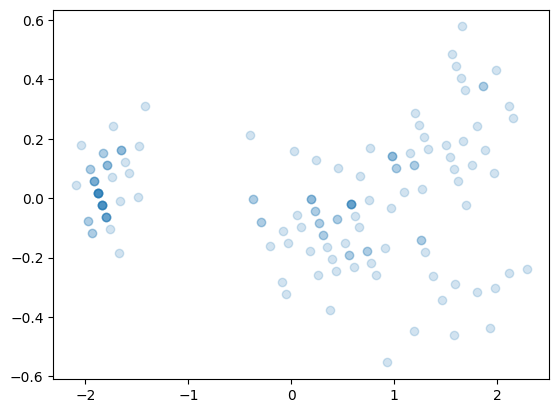

In [32]:
# Die ursprünglichen Daten in das neue Koordinatensystem umrechnen
X_new = X_pca.transform(X)

# Die neuen Daten im neuen Koordinatensystem darstellen
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.2)
plt.show()

In [33]:
# Nutzen wir jetzt alle 4 features aus den Daten
X = iris.data.values # dieses Mal werden zwei Features genommen!
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PCA nochmals trainieren
pca = PCA()
X_pca = pca.fit(X)

# Wiederum die Parameter der Linearkombination ausgeben:
display(pca.components_)

# Die erklärte Varianz ausgeben:
display(pca.explained_variance_ratio_)

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [50]:
import numpy as np
import pandas as pd
numbers = np.array(range(1, len(pca.explained_variance_ratio_)+1))
df = pd.DataFrame({'Erklärte Varianz': pca.explained_variance_ratio_}, index=numbers)
display(df)

,Erklärte Varianz
1,0.729624
2,0.228508
3,0.036689
4,0.005179


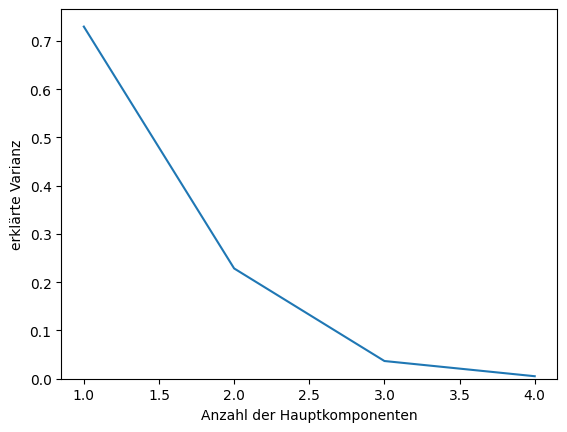

In [53]:
# Die erklärte Varianz in einem Linien-Chart darstellen, die Grafik bei 0 starten
plt.plot(df)
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('erklärte Varianz')
plt.ylim(bottom=0)
plt.show()

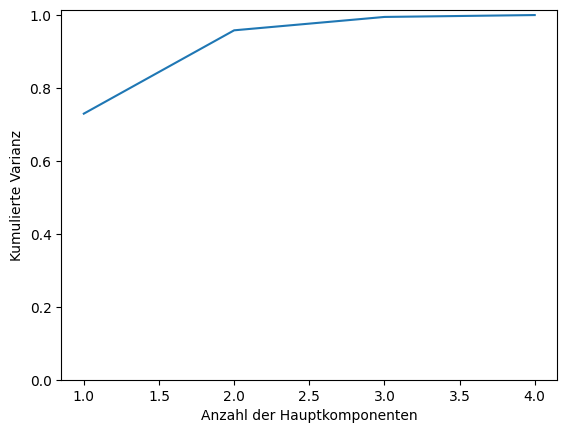

In [52]:
# Die aggregierte erklärte Varianz in einem Linien-Chart darstellen, die Grafik bei 0 starten
plt.plot(np.cumsum(df))
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulierte Varianz')
plt.ylim(bottom=0)
plt.show()